In [10]:
import pandas as pd
import MonteCarloEstimation as monte_carlo
import PartialCointegration as pci
import sys
sys.path.append('/Users/sebastiencaron/Desktop/PCI-Project/Simulation')

from importlib import reload
import PCISimulation as simul
import matplotlib.pyplot as plt
import SensitivityAnalysis as SA
import pickle


reload(pci)
reload(simul)

reload(SA)
reload(monte_carlo)

from datetime import datetime
import numpy as np
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


In [3]:
params = [10, 0 , 1, 0.9, 1, 1, 0.0236] #N, alpha, beta, rho, sigma_R, sigma_X
monte_carlo.MonteCarloEstimation.f_monte_carlo(n_simulation = 100, params= params, csv_option = False, LRT_mode= True)

,alpha,beta,rho,sigma_M,sigma_R,ll_par,ll_rw,lrt
0,18.573679,0.821489,0.519877,1.208520,0.000100,-14.477711,-15.691363,-1.213652
1,21.963524,1.210839,-0.423448,1.161639,0.473904,-15.111692,-17.158243,-2.046551
2,41.909564,0.593543,1.000000,0.832172,0.879952,-14.493847,-14.497068,-0.003221
3,-2.748757,0.826121,-0.995233,0.366291,0.626995,-9.845904,-16.781253,-6.935349
4,-6.635137,1.085654,0.823535,1.020006,1.026060,-16.108176,-16.169496,-0.061320
...,...,...,...,...,...,...,...,...
95,-16.971365,1.142800,0.845238,1.253109,0.618165,-15.773990,-15.925789,-0.151799
96,-18.329329,1.388193,0.186724,0.832944,0.000100,-11.205351,-12.414868,-1.209517
97,2.650936,1.009632,0.176353,0.840111,1.373787,-17.058176,-17.166895,-0.108719
98,10.861111,1.042035,-0.950350,0.454295,0.718932,-11.237205,-13.231257,-1.994052


## Creation table 3-4


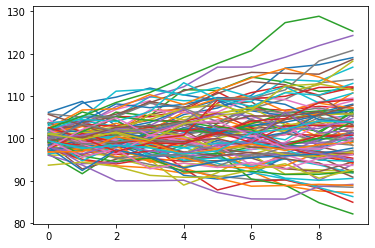

In [5]:
params = [10, 0 , 1, 0.9, 1, 1, 0.0236] #N, alpha, beta, rho, sigma_R, sigma_X
n_periods, alpha_s, beta_s, rho_s, sigma_M_s, sigma_R_s, sigma_X_s = params
simultmp = simul.pci_generator(n_periods, alpha_s, beta_s, rho_s, sigma_M_s, sigma_R_s, sigma_X_s).f_generate_trajectories(trajectory=100)
plt.plot(simultmp[:, :, 0]) # Prix de l'actif X0

In [8]:
n_periods = 1000
alpha = 0
beta = 1
rho = 0.9
sigma_R = 1
sigma_M = 1
sigma_X = 0.0236
params = [alpha, beta, rho, sigma_M, sigma_R, sigma_X] #N, alpha, beta, rho, sigma_R, sigma_X
# On enleve sigma_M
fixed_params_SigmaM = [alpha, beta, rho, sigma_R, sigma_X]
fixed_params_rho = [alpha, beta, sigma_M, sigma_R, sigma_X]


In [9]:
result = SA.SensitivityAnalysis.f_sensitivity_analysis(fixed_params = fixed_params_SigmaM, var_param ="sigma_M", n_simulation = 5, n =[100, 1001, 10000])


In [2]:
from concurrent.futures import ProcessPoolExecutor, as_completed

import concurrent
import numpy as np

def monte_carlo_wrapper(params):
    n_sample, alpha, beta, rho, sigma_M, sigma_R, sigma_X, n_simulation = params
    result = monte_carlo.MonteCarloEstimation.f_monte_carlo(n_simulation=n_simulation, params=[n_sample, alpha, beta, rho, sigma_M, sigma_R, sigma_X], csv_option=False, LRT_mode=False)
    return f'{sigma_M}{n_sample}', result

def f_sensitivity_analysis(fixed_params: list, var_param: str = "sigma_M", n_simulation: int = 10000, n: list = [100, 1000, 10000]) -> dict:
    Mydict = {}
    lst_truevalue = []
    
    if var_param == "sigma_M":
        increment = (0, 2, 0.5)
        start, end, by = increment
        alpha, beta, rho, sigma_R, sigma_X = fixed_params
        sigma_M_values = np.arange(start, end + by, by)
        lst_truevalue = [[beta, rho, sigma_M, sigma_R] for sigma_M in sigma_M_values]
        
        tasks = [(n_sample, alpha, beta, rho, sigma_M, sigma_R, sigma_X, n_simulation) for n_sample in n for sigma_M in sigma_M_values]
        
        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(executor.map(monte_carlo_wrapper, tasks))
            
        for key, result in results:
            Mydict[key] = result
    
        return {"Parameter": var_param, "Result": Mydict, "Increment": sigma_M_values, 'TrueValue': lst_truevalue, "n": n}



In [5]:
result2 = f_sensitivity_analysis(fixed_params = fixed_params_SigmaM, var_param ="sigma_M", n_simulation = 5, n =[50])

In [12]:
with open(r"Outputs_parameters/resultSigma.pickle", "rb") as input_file:
    sigma_values_dict = pickle.load(input_file)
sigma_values_dict

{'Parameter': 'sigma_M',
 'Result': {'0.0100':          alpha      beta       rho   sigma_M   sigma_R      ll_par
  0     3.431352  0.954417 -0.623471  0.004811  1.110971 -150.838509
  1     1.748547  0.995334  0.228671  0.000100  1.086964 -148.730277
  2     0.317063  0.974451  0.038554  0.243311  0.953484 -138.791433
  3    -5.604890  1.047120  0.944385  0.611693  0.639179 -128.281253
  4    -6.944364  1.076490 -0.204343  0.299158  0.923866 -137.552316
  ...        ...       ...       ...       ...       ...         ...
  9995 -9.284945  1.077410  0.712471  0.458424  0.829487 -134.989531
  9996  1.294583  0.976699 -0.271698  0.182204  0.880610 -129.624581
  9997  6.676785  0.910771  0.659728  0.581694  0.847006 -143.238046
  9998 -0.307180  0.993599 -0.450388  0.279175  0.962217 -140.706636
  9999  1.121347  1.003438  0.044877  0.357464  0.961338 -143.125717
  
  [10000 rows x 6 columns],
  '0.5100':           alpha      beta       rho   sigma_M   sigma_R      ll_par
  0     -6.41732

In [13]:
SA.create_table(sigma_values_dict).construct_table()

[100, 1000, 10000]
[100, 1000, 10000]
[100, 1000, 10000]
20 20 20


,sigma_M,R_square,Parameter,MSE100,MSE1000,MSE10000,AVG100,AVG1000,AVG10000,TrueParameter
0,0.0,0.00,beta,0.001935,0.000206,0.000041,0.999423,0.999989,0.999993,1.0
1,0.0,0.00,rho,0.560434,0.544742,0.704473,0.441413,0.474751,0.367725,0.9
2,0.0,0.00,sigma_M,0.351578,0.245007,0.144369,0.501428,0.388711,0.235948,0.0
3,0.0,0.00,sigma_R,0.123399,0.057298,0.031957,0.752350,0.849692,0.912784,1.0
4,0.5,0.21,beta,0.002363,0.000269,0.000050,1.000494,1.000049,0.999968,1.0
5,0.5,0.21,rho,0.507587,0.406308,0.242958,0.476224,0.557761,0.650515,0.9
6,0.5,0.21,sigma_M,0.131178,0.099720,0.073427,0.608979,0.520758,0.440406,0.5
7,0.5,0.21,sigma_R,0.115174,0.046849,0.018378,0.814649,0.922984,0.992027,1.0
8,1.0,0.51,beta,0.003929,0.000466,0.000085,0.999614,1.000109,1.000012,1.0
9,1.0,0.51,rho,0.397737,0.121400,0.007038,0.551243,0.758740,0.864444,0.9


#### testons



In [265]:
result["Result"].keys()

dict_keys(['0.0100', '0.5100', '1.0100', '1.5100', '2.0100', '0.01001', '0.51001', '1.01001', '1.51001', '2.01001', '0.010000', '0.510000', '1.010000', '1.510000', '2.010000'])

In [273]:
np.mean((result["Result"]["0.0100"]["beta"] - 1) ** 2)

8.315546517948576e-05

## Creation critical Values

In [279]:
from CriticalValues import *

quantile = [0.01, 0.05, 0.10, 0.15]
CriticalValues(quantile=quantile).create_tableQuantile()

,p=0.01,p=0.05,p=0.1,p=0.15
50,-4.492725,-2.743415,-2.056909,-1.609613
100,-4.931491,-2.678732,-1.752340,-1.358319
250,-3.710453,-2.152422,-1.747253,-1.365707
500,-3.786400,-2.494277,-1.882354,-1.402885
1000,-3.663431,-2.439019,-1.801624,-1.392159
2500,-4.156469,-2.491584,-1.899061,-1.477177


In [6]:
n_periods = [100, 1000, 10000]
n_sim = 10000
alpha = 0
beta = 1
rho = 0.9
sigma_R = 1
sigma_M = 1
sigma_X = 0.0236
params = [alpha, beta, rho, sigma_M, sigma_R, sigma_X] #N, alpha, beta, rho, sigma_R, sigma_X
# On enleve sigma_M
fixed_params_SigmaM = [n_periods, alpha, beta, rho, sigma_R, sigma_X]
fixed_params_rho = [n_periods, alpha, beta, sigma_M, sigma_R, sigma_X]

result_dict = SA.SensitivityAnalysis.f_sensitivity_analysis(fixed_params = fixed_params_SigmaM, var_param ="sigma_M", n_simulation = n_sim, n = n_periods)


100
Computing sigma_M: 0.0 and nPeriods: 100


TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
result_dict = SA.SensitivityAnalysis.f_sensitivity_analysis(fixed_params = fixed_params_SigmaM, var_param ="sigma_M", n_simulation = n_sim, n = n_periods)


In [7]:
result = SA.SensitivityAnalysis.f_sensitivity_analysis(fixed_params = fixed_params_SigmaM, var_param ="sigma_M", n_simulation = 5, n =[100, 1001, 10000])


100
Computing sigma_M: 0.0 and nPeriods: 100


TypeError: 'list' object cannot be interpreted as an integer